In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Dataset.csv")

In [3]:
df.head()

,Prev_Insured_binary,Vehicle_damage_binary,< 1 Year,> 2 Years,Age_scaled,Target
0,0,1,0,0,0.369231,0
1,1,0,1,0,0.046154,0
2,0,1,0,0,0.353846,0
3,1,0,0,0,0.615385,0
4,0,1,0,0,0.338462,0


In [4]:
#Separate X and y (explanatory variables and target variable)
X = df.iloc[:,0:-1]
y = df.iloc[:,-1] #[-1]]

#X.head()
#y.head()

In [5]:
from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.30, #by default is 75%-25%
                                                    #shuffle is set True by default,
                                                    stratify=None, #preserve target proportions 
                                                    random_state= 123) #fix random seed for replicability

print(X_train.shape, X_test.shape)

(71645, 5) (30706, 5)


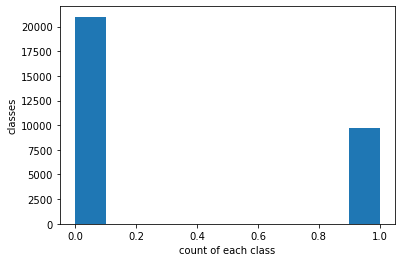

In [10]:
#Visualize Class Counts
plt.hist(y_test)
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.show()

## DECISION TREE

In [44]:
#DEFINE YOUR CLASSIFIER and THE PARAMETERS GRID
from sklearn.tree import DecisionTreeClassifier
import numpy as np

classifier = DecisionTreeClassifier(random_state=0)
parameters = {'criterion': ['entropy','gini'], 
              'max_depth': [3,5,10, 50],
              'min_samples_split': [5,10],
              'min_samples_leaf': [2,4]}

In [45]:
#DEFINE YOUR GRIDSEARCH 
'''
GS perfoms an exhaustive search over specified parameter values for an estimator.
GS uses a Stratified K-Folds cross-validator
(The folds are made by preserving the percentage of samples for each class.)
If refit=True the model is retrained on the whole training set with the best found params
'''
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=10, n_jobs=-1)

In [46]:
#TRAIN YOUR CLASSIFIER
gs = gs.fit(X_train, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    5.7s finished


In [47]:
#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')

print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

***GRIDSEARCH RESULTS***
Best score: 0.691232 using {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5}
0.691232 (0.002177) with: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5}
0.691232 (0.002177) with: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 10}
0.691232 (0.002177) with: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 5}
0.691232 (0.002177) with: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10}
0.668694 (0.008648) with: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5}
0.668694 (0.008648) with: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}
0.668694 (0.008648) with: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5}
0.668694 (0.008648) with: {'criterion': 'entropy', 'max_dep

In [48]:
#TEST ON YOUR TEST SET 
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)

y_pred_train = best_model.predict(X_train)

In [49]:
#This is your prediction on the TEST SET
y_pred

array([1, 1, 0, ..., 1, 1, 0])

In [50]:
#EVALUATE YOUR PREDICTION (on the y_test that you left aside)
from sklearn import metrics

print('***RESULTS ON TRAIN SET***')
print("f1_score: ", metrics.f1_score(y_train, y_pred_train))
print("--")
print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred))

***RESULTS ON TRAIN SET***
f1_score:  0.6912335276120806
--
***RESULTS ON TEST SET***
f1_score:  0.6910213738621327


In [51]:
#PRINT SOME FURTHER METRICS
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.68      0.79     21001
           1       0.57      0.89      0.69      9705

    accuracy                           0.75     30706
   macro avg       0.75      0.79      0.74     30706
weighted avg       0.81      0.75      0.76     30706



In [52]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[14385  6616]
 [ 1089  8616]]


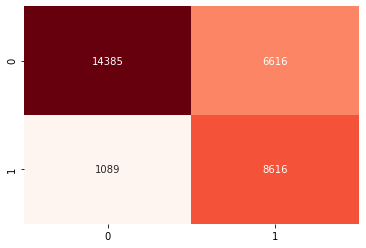

In [53]:
# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Reds", cbar=False);

#annot=True to annotate cells fmt: format

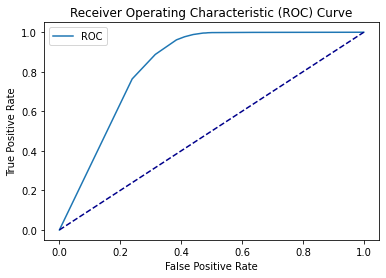

AUC: 0.83


In [54]:
from sklearn import metrics
model = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=4, min_samples_split=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt

plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)

In [55]:
X_train.columns.tolist()

['Prev_Insured_binary',
 'Vehicle_damage_binary',
 '< 1 Year',
 '> 2 Years',
 'Age_scaled']

In [56]:
from sklearn import tree
r = tree.export_text(model,feature_names=X_test.columns.tolist())
print(r)


|--- Prev_Insured_binary <= 0.50
|   |--- Vehicle_damage_binary <= 0.50
|   |   |--- Age_scaled <= 0.59
|   |   |   |--- < 1 Year <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- < 1 Year >  0.50
|   |   |   |   |--- class: 0
|   |   |--- Age_scaled >  0.59
|   |   |   |--- Age_scaled <= 0.81
|   |   |   |   |--- class: 0
|   |   |   |--- Age_scaled >  0.81
|   |   |   |   |--- class: 0
|   |--- Vehicle_damage_binary >  0.50
|   |   |--- Age_scaled <= 0.10
|   |   |   |--- Age_scaled <= 0.02
|   |   |   |   |--- class: 0
|   |   |   |--- Age_scaled >  0.02
|   |   |   |   |--- class: 0
|   |   |--- Age_scaled >  0.10
|   |   |   |--- Age_scaled <= 0.58
|   |   |   |   |--- class: 1
|   |   |   |--- Age_scaled >  0.58
|   |   |   |   |--- class: 0
|--- Prev_Insured_binary >  0.50
|   |--- Vehicle_damage_binary <= 0.50
|   |   |--- Age_scaled <= 0.62
|   |   |   |--- Age_scaled <= 0.19
|   |   |   |   |--- class: 0
|   |   |   |--- Age_scaled >  0.19
|   |   |   |   |--- class: 0
|

[Text(176.36785714285713, 195.696, 'X[0] <= 0.5\nentropy = 0.902\nsamples = 71645\nvalue = [48877, 22768]'),
 Text(95.65714285714286, 152.208, 'X[1] <= 0.5\nentropy = 1.0\nsamples = 46045\nvalue = [23351, 22694]'),
 Text(47.82857142857143, 108.72, 'X[4] <= 0.592\nentropy = 0.523\nsamples = 3735\nvalue = [3295, 440]'),
 Text(23.914285714285715, 65.232, 'X[2] <= 0.5\nentropy = 0.55\nsamples = 3318\nvalue = [2896, 422]'),
 Text(11.957142857142857, 21.744, 'entropy = 0.618\nsamples = 1620\nvalue = [1372, 248]'),
 Text(35.871428571428574, 21.744, 'entropy = 0.477\nsamples = 1698\nvalue = [1524, 174]'),
 Text(71.74285714285715, 65.232, 'X[4] <= 0.808\nentropy = 0.257\nsamples = 417\nvalue = [399, 18]'),
 Text(59.785714285714285, 21.744, 'entropy = 0.303\nsamples = 315\nvalue = [298, 17]'),
 Text(83.7, 21.744, 'entropy = 0.079\nsamples = 102\nvalue = [101, 1]'),
 Text(143.4857142857143, 108.72, 'X[4] <= 0.1\nentropy = 0.998\nsamples = 42310\nvalue = [20056, 22254]'),
 Text(119.57142857142857,

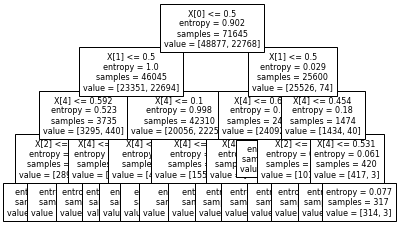

In [57]:
tree.plot_tree(model, fontsize=8)

## RANDOM FOREST

In [31]:
from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier(n_estimators=30, criterion='entropy', max_depth=6, min_samples_split=4, min_samples_leaf=2)
#rand_forest = RandomForestClassifier()
rand_forest.fit(X_train, y_train)

y_pred = rand_forest.predict(X_test)

In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.76      0.81     21001
           1       0.60      0.77      0.67      9705

    accuracy                           0.76     30706
   macro avg       0.74      0.77      0.74     30706
weighted avg       0.79      0.76      0.77     30706



In [35]:
#EVALUATE YOUR PREDICTION (on the y_test that you left aside)
from sklearn import metrics

print('***RESULTS ON TRAIN SET***')
print("f1_score: ", metrics.f1_score(y_train, y_pred_train))
print("--")
print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred))

***RESULTS ON TRAIN SET***
f1_score:  0.6912335276120806
--
***RESULTS ON TEST SET***
f1_score:  0.6735755944369672


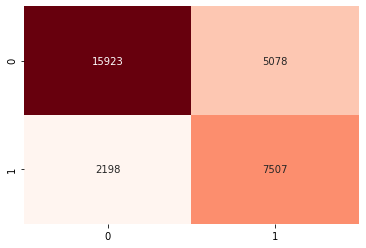

In [33]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Reds", cbar=False);

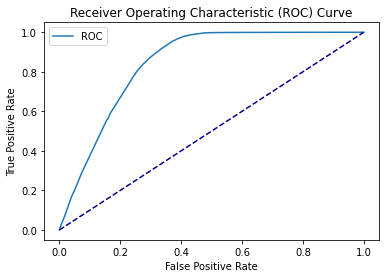

AUC: 0.84


In [34]:
# ROC curve

from sklearn import metrics

y_probs = rand_forest.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)

## ADABOOST 

In [37]:
from sklearn.model_selection import GridSearchCV

classifier= AdaBoostClassifier()
parameters = {'n_estimators' : [100, 500, 1000, 2000],
    'learning_rate' : [0.0001, 0.01, 0.1, 1.0]}

gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=10, n_jobs=-1, refit=True)

gs.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   34.8s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done  46 out of  48 | elapsed:  8.1min remaining:   21.1s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  8.3min finished


GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.01, 0.1, 1.0],
                         'n_estimators': [100, 500, 1000, 2000]},
             scoring='f1', verbose=10)

In [38]:
#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')

print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

***GRIDSEARCH RESULTS***
Best score: 0.684612 using {'learning_rate': 0.01, 'n_estimators': 500}
0.669976 (0.002418) with: {'learning_rate': 0.0001, 'n_estimators': 100}
0.669976 (0.002418) with: {'learning_rate': 0.0001, 'n_estimators': 500}
0.683920 (0.002353) with: {'learning_rate': 0.0001, 'n_estimators': 1000}
0.683920 (0.002353) with: {'learning_rate': 0.0001, 'n_estimators': 2000}
0.683920 (0.002353) with: {'learning_rate': 0.01, 'n_estimators': 100}
0.684612 (0.002244) with: {'learning_rate': 0.01, 'n_estimators': 500}
0.677301 (0.002397) with: {'learning_rate': 0.01, 'n_estimators': 1000}
0.672453 (0.007206) with: {'learning_rate': 0.01, 'n_estimators': 2000}
0.677301 (0.002397) with: {'learning_rate': 0.1, 'n_estimators': 100}
0.672758 (0.007672) with: {'learning_rate': 0.1, 'n_estimators': 500}
0.672784 (0.007685) with: {'learning_rate': 0.1, 'n_estimators': 1000}
0.673026 (0.007999) with: {'learning_rate': 0.1, 'n_estimators': 2000}
0.676792 (0.002868) with: {'learning_rate

In [39]:
#TEST ON YOUR TEST SET 
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)

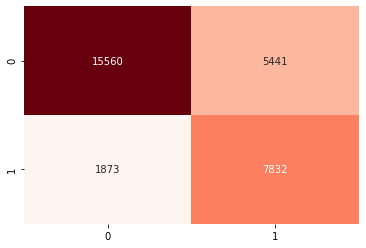

In [40]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Reds", cbar=False);

In [41]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.74      0.81     21001
           1       0.59      0.81      0.68      9705

    accuracy                           0.76     30706
   macro avg       0.74      0.77      0.75     30706
weighted avg       0.80      0.76      0.77     30706



In [42]:
y_pred_train = adaboost.predict(X_train)
print("f1_score: ", metrics.f1_score(y_train, y_pred_train))

f1_score:  0.6759056929269696


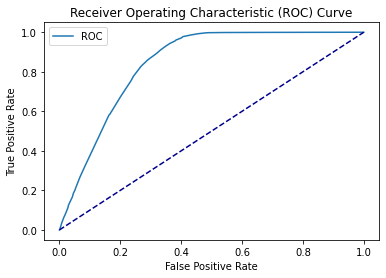

AUC: 0.84


In [43]:
adaboost = AdaBoostClassifier(n_estimators=500, learning_rate=0.1)

adaboost.fit(X_train,y_train)

y_probs = adaboost.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)